In [1]:
import pandas as pd
import numpy as np
import wfdb
import ast

In [2]:
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,ConvLSTM1D,TimeDistributed,Conv1D,MaxPooling1D,Flatten,LSTM,ConvLSTM2D,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical


In [3]:
from tensorflow import keras

In [4]:
import tensorflow as tf

In [5]:
import ecg_plot

In [6]:
from dataset import myData

原数据集训练样本数：19634，去除空值后样本数：10452
原数据集测试样本数：2203，去除空值后样本数：1169


In [7]:
data=myData()

In [8]:
X_train,y_train,X_test,y_test=data.dataset01()

X_train'shape:(10452, 1000, 12)  y_train'shape:(10452, 2)  X_test'shape:(1169, 1000, 12)  y_test'shape:(1169, 2)


In [9]:
X_train.shape,X_test.shape

((10452, 1000, 12), (1169, 1000, 12))

In [10]:
ecg = X_train[0].T # load data should be implemented by yourself 

In [11]:
ecg.shape

(12, 1000)

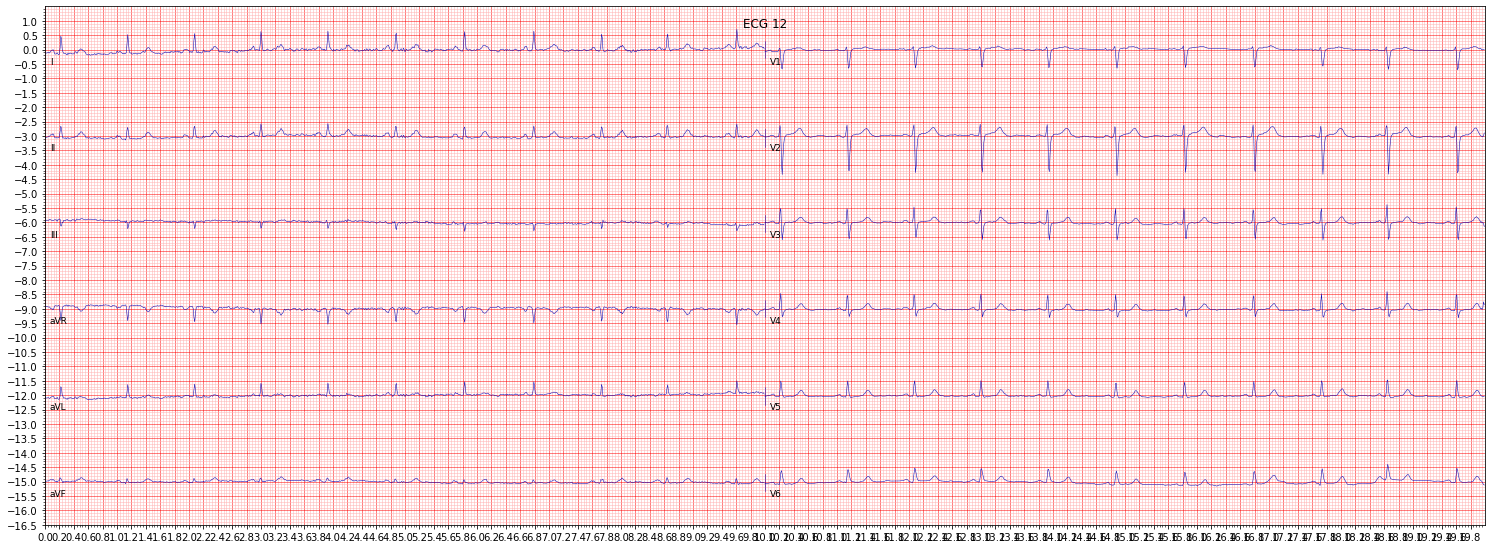

In [12]:
ecg_plot.plot(ecg, sample_rate = 100, title = 'ECG 12')
ecg_plot.show()

In [15]:
X_train.shape[1], X_train.shape[2], y_train.shape[1]

(1000, 12, 2)

In [16]:
X_train.shape[0]

10452

In [17]:


n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
# reshape into subsequences (samples, time steps, rows, cols, channels)
n_steps, n_length = 1, 1000
X_train = X_train.reshape((X_train.shape[0], n_steps, 1, n_length, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, 1, n_length, n_features))

In [18]:
X_train.shape[2],X_train.shape[1],X_train.shape[2]

(1, 1, 1)

In [19]:
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))


In [20]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

In [21]:
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(0.003), metrics=["accuracy"])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 1, 998, 64)        58624     
                                                                 
 dropout (Dropout)           (None, 1, 998, 64)        0         
                                                                 
 flatten (Flatten)           (None, 63872)             0         
                                                                 
 dense (Dense)               (None, 100)               6387300   
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 6,446,126
Trainable params: 6,446,126
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X_train, y_train, batch_size=128, epochs=15, validation_data=(X_test, y_test), validation_freq=1,callbacks=callbacks)


Epoch 1/15
82/82 [==============================] - 77s 917ms/step - loss: 0.4506 - accuracy: 0.7997 - val_loss: 0.4084 - val_accuracy: 0.8375
Epoch 2/15
82/82 [==============================] - 74s 899ms/step - loss: 0.3463 - accuracy: 0.8678 - val_loss: 0.4183 - val_accuracy: 0.8358
Epoch 3/15
82/82 [==============================] - 73s 890ms/step - loss: 0.3015 - accuracy: 0.8858 - val_loss: 0.3873 - val_accuracy: 0.8400
Epoch 4/15
82/82 [==============================] - 77s 938ms/step - loss: 0.2463 - accuracy: 0.9101 - val_loss: 0.4131 - val_accuracy: 0.8494
Epoch 5/15
82/82 [==============================] - 74s 897ms/step - loss: 0.2180 - accuracy: 0.9244 - val_loss: 0.4635 - val_accuracy: 0.8375
Epoch 6/15
82/82 [==============================] - 74s 897ms/step - loss: 0.1493 - accuracy: 0.9500 - val_loss: 0.6453 - val_accuracy: 0.8375
Epoch 7/15
82/82 [==============================] - 74s 903ms/step - loss: 0.1101 - accuracy: 0.9661 - val_loss: 0.6248 - val_accuracy: 0.8015

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
 

In [25]:
actual = y_test.argmax(axis=1)     #真实的类别标签（将one-hot)标签逆向
predict_x=model.predict(X_test) #预测标签
predicted=np.argmax(predict_x,axis=1)#one-hot编码逆向

# 计算总的精度
acc = accuracy_score(actual, predicted)
print("准确率： ",acc)
# 计算混淆矩阵
print("混淆矩阵：")
print(confusion_matrix(actual, predicted))
#计算 precision_score
print("precision_score:",end="  ")
print(precision_score(actual, predicted, average="binary", pos_label=1)) # pos_label设置为1，代表标签为1的样本是正例，标签为2的样本是负例。
#	recall
print("recall: ",end=" ")
print(recall_score(actual, predicted, average="binary", pos_label=1))
#	F1
print("f1 score: ",end=" ")
print(f1_score(actual, predicted, average="binary", pos_label=1))

准确率：  0.8400342172797263
混淆矩阵：
[[113 143]
 [ 44 869]]
precision_score:  0.8586956521739131
recall:  0.9518072289156626
f1 score:  0.9028571428571429
